In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 78.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.3 MB/s eta 0:00:00
Mounted at /content/gdrive


In [27]:
#hide
from fastbook import *
from fastai.vision.widgets import *


In [4]:
pip install duckduckgo_search


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.3 MB/s eta 0:00:00


In [5]:
from duckduckgo_search import ddg_images

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')




In [ ]:
urls = search_images('dead plant', max_images=1)
urls[0]

Searching for 'dead plant'


/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'https://www.gardeningknowhow.com/wp-content/uploads/2007/12/dead-houseplant.jpg'

In [ ]:
from fastdownload import download_url
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [58]:
path = Path('/content/gdrive/MyDrive/Colab Notebooks/chapter 2/healthyornot')


In [7]:
search = ['healthy plant', 'dead plant']
from time import sleep

for e in search:
  dest = (path/e)
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest, urls=search_images(f'{e} sun photo'))
  sleep(10)  # Pause between searches to avoid over-loading server
  download_images(dest, urls=search_images(f'{e} shade photo'))
  sleep(10)
  resize_images(path, max_size=400, dest=path)

OSError: ignored

In [37]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

clean up dataset of corrupt images

In [64]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)

plants = plants.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.3),
    batch_tfms=aug_transforms()
    )




In [65]:
dls = plants.dataloaders('/content/drive/MyDrive/Colab Notebooks/chapter 2/healthyornot/healthy plant', bs=32)


In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,00:15
1,0.000000,0.000000,0.000000,00:13
2,0.000000,0.000000,0.000000,00:13
3,0.000000,0.000000,0.000000,00:11


In [66]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

OSError: ignored

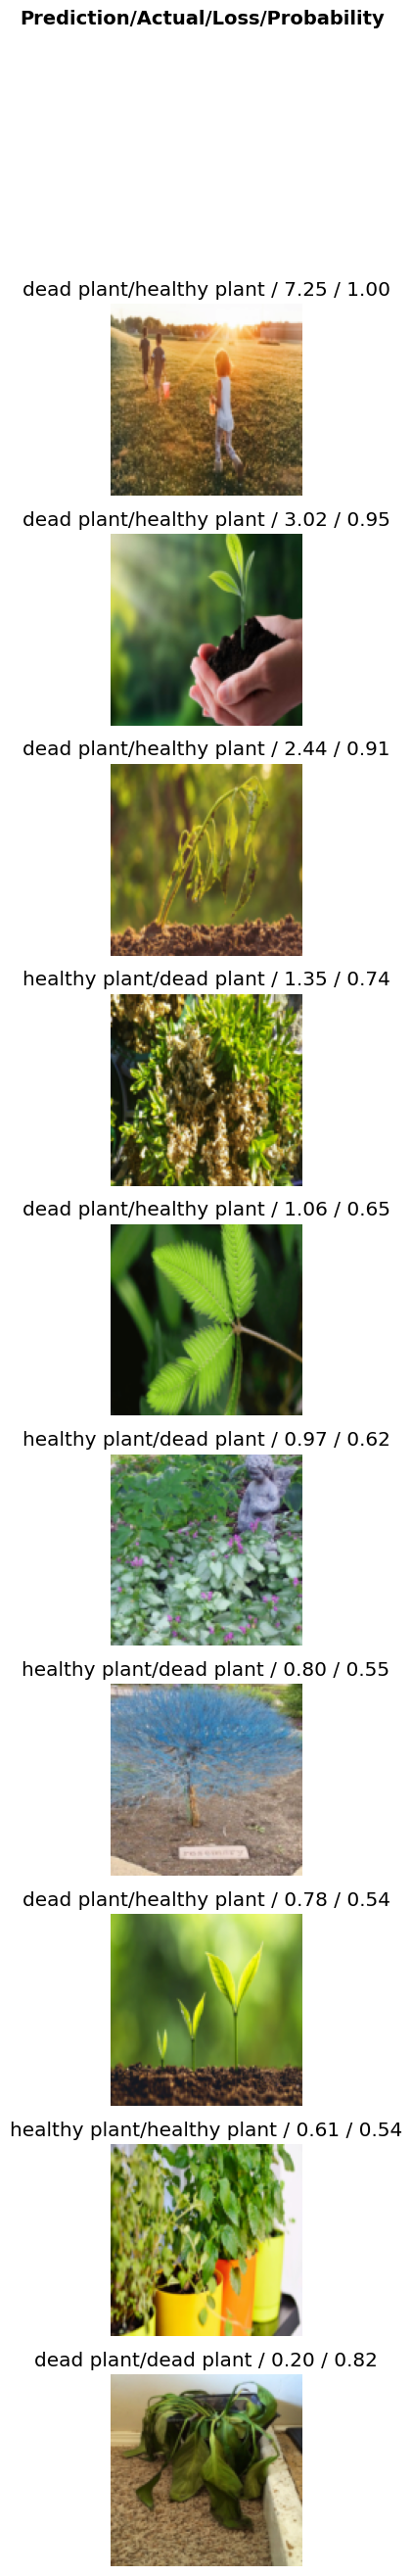

In [48]:
interp.plot_top_losses(10, nrows=10)

In [54]:
cleaner = ImageClassifierCleaner(learn)
cleaner

OSError: ignored

In [51]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

OSError: ignored